![Descripción](08-nn.png)

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [130]:
import tensorflow as tf
session = tf.Session()

In [131]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data]) ## entra desde la columna 0 a la 2, la 3 no entra
y_vals = np.array([x[3] for x in iris.data])

## semilla de aleatoriedad

In [132]:
seed = 19
tf.set_random_seed(seed)
np.random.seed(seed)

## conjunto de entrenamiento y test

In [133]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

## normalizacion de datos

In [134]:
# funcion para normalizar los datos
def normalize_col(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min)/(col_max-col_min)

In [135]:
x_vals_train = np.nan_to_num(normalize_col(x_vals_train))
x_vals_test = np.nan_to_num(normalize_col(x_vals_test))

## placeholders

In [144]:
batch_size = 50
x_data = tf.placeholder(shape=[None,3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

## variables

In [137]:
hiden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hiden_layer_nodes]))
bias = tf.Variable(tf.random_normal(shape=[hiden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hiden_layer_nodes,1]))
bias2 = tf.Variable(tf.random_normal(shape=[1]))

## modelado de las capas

In [138]:
hiden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), bias)) ##esta es la capa oculta(color naranja en el grafico)
final_output = tf.nn.relu(tf.add(tf.matmul(hiden_output, A2), bias2)) ## esta es la capa de salida(color amarillo en el grafico)

## funcion de perdidas

In [139]:
loss = tf.reduce_mean(tf.square(tf.subtract(y_target, final_output)))

## optimizador

In [140]:
optimizador = tf.train.GradientDescentOptimizer(0.005)
train_step = optimizador.minimize(loss)

## inicializar variables

In [141]:
init = tf.global_variables_initializer()
session.run(init)

## entrenamiento

In [142]:
loss_vect = []
test_loss = []
for i in range(500):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_loss = session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vect.append(np.sqrt(temp_loss))
    
    temp_loss_test = session.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(temp_loss_test))
    
    if(i+1)%50==0:
        print("Paso #"+str(i+1)+", Loss = "+str(temp_loss))

Paso #50, Loss = 0.15891816
Paso #100, Loss = 0.13749318
Paso #150, Loss = 0.018901542
Paso #200, Loss = 1.3528352
Paso #250, Loss = 0.17040056
Paso #300, Loss = 0.85035485
Paso #350, Loss = 0.058384173
Paso #400, Loss = 0.47746435
Paso #450, Loss = 0.5856306
Paso #500, Loss = 0.21054018


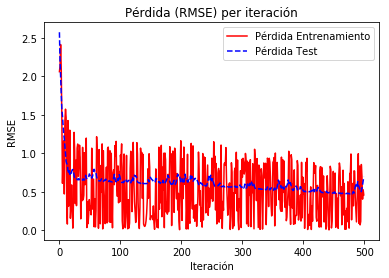

In [143]:
plt.plot(loss_vect, "r-", label="Pérdida Entrenamiento")
plt.plot(test_loss, "b--", label ="Pérdida Test")
plt.title("Pérdida (RMSE) per iteración")
plt.xlabel("Iteración")
plt.ylabel("RMSE")
plt.legend(loc ="upper right")
plt.show()

In [145]:
print(session.run(A1))

[[ 0.3277653  -0.17244284  0.5106364   0.67889184 -1.0390817 ]
 [-1.8840988  -2.236363    0.5625913  -1.4799025   0.39704576]
 [ 0.43868628 -0.42924485  2.0110612   0.40820462 -1.2935936 ]]


In [146]:
print(session.run(b1))

[-0.06483552  0.44075635  2.3485446   0.52345073 -1.0367848 ]


In [147]:
print(session.run(A2))

[[ 0.43267244]
 [-0.80964017]
 [ 0.2793637 ]
 [ 0.30251142]
 [-1.1266627 ]]


In [148]:
print(session.run(b2))

[0.7102105]
